In [35]:
import numpy as np

(1900544, 2)


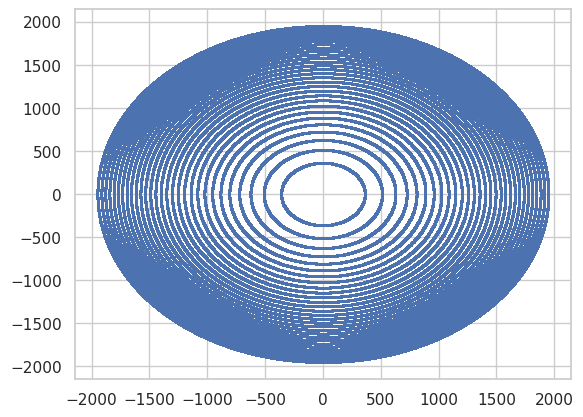

In [36]:
scaling_factor = 65536

def papernot_sample(N: int):
    u1 = np.random.randint(0, scaling_factor, N)
    u2 = np.random.randint(0, scaling_factor, N)
    r = (scaling_factor * np.sqrt(-2 * np.log((u1 + 1) / (scaling_factor + 1)))).astype(int)
    sample = np.stack([r * (scaling_factor * np.cos(2 * np.pi * u2 / scaling_factor)).astype(int), r * (scaling_factor * np.sin(2 * np.pi * u2 / scaling_factor)).astype(int)], axis= 1)
    sample += (scaling_factor >> 1)
    sample //= scaling_factor
    return sample


def papernot_suport(radius: float):
    u1 = np.arange(0, scaling_factor)
    u2 = np.arange(0, scaling_factor)
    r = (scaling_factor * np.sqrt(-2 * np.log((u1 + 1) / (scaling_factor + 1)))).astype(int)
    mask = r < (scaling_factor * radius)
    theta = (scaling_factor * np.stack([np.cos(2 * np.pi * u2 / scaling_factor), np.sin(2 * np.pi * u2 / scaling_factor)], axis= 1)).astype(int)
    supp = r[mask, None, None] * theta[None, :, :]
    supp += (scaling_factor >> 1)
    supp //= scaling_factor
    return supp.reshape(-1, 2)
    
supp = papernot_suport(0.03)
print(supp.shape)

# Plot the samples in 2D
import matplotlib.pyplot as plt
plt.scatter(supp[:, 0], supp[:, 1], marker='o', s=1)
plt.show()


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../logs/vrr.csv')

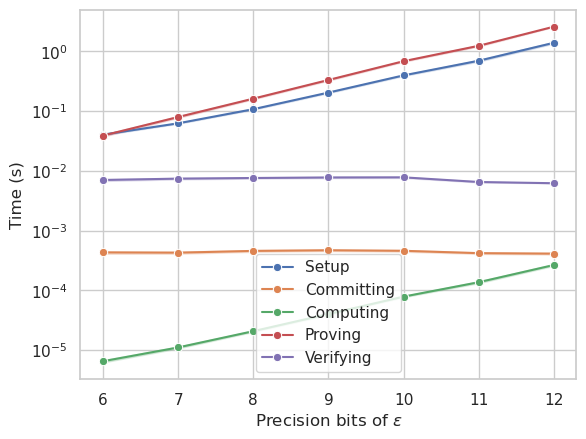

In [46]:
# use seaborn
import seaborn as sns
sns.set(style="whitegrid")

# plot (setup, committing, computing, proving, verifying) |vs inv_prec with error bar
plt.figure()
sns.lineplot(x = 'log_prec', y = 'setup', data = df, marker='o', label='Setup')
sns.lineplot(x = 'log_prec', y = 'committing', data = df, marker='o', label='Committing')
sns.lineplot(x = 'log_prec', y = 'computing', data = df, marker='o', label='Computing')
sns.lineplot(x = 'log_prec', y = 'proving', data = df, marker='o', label='Proving')
sns.lineplot(x = 'log_prec', y = 'verifying', data = df, marker='o', label='Verifying')
plt.legend()

# y axis in log scale
plt.yscale('log')

# x axis legend: precision bits
plt.xlabel('Precision bits of $\epsilon$')

# y axis legend: time in seconds
plt.ylabel('Time (s)')



plt.show()


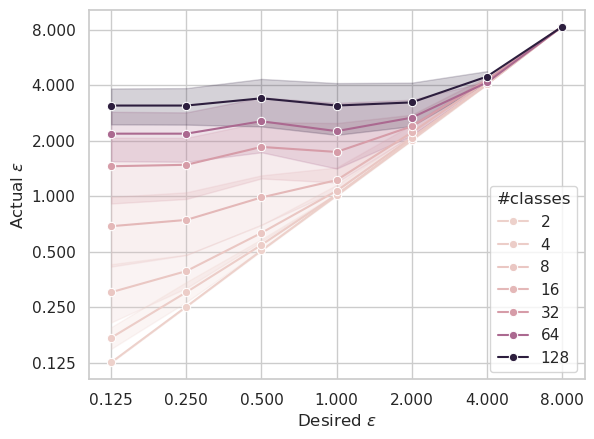

In [52]:
# use seaborn
import seaborn as sns
sns.set(style="whitegrid")

# plot (setup, committing, computing, proving, verifying) vs inv_prec with error bar
plt.figure()
sns.lineplot(x = 'eps', y = 'actual_eps', hue = 'num_class', data = df, marker='o', legend='full')
plt.legend()

# x, y axis in log2 scale
plt.xscale('log')
plt.yscale('log')

# denser marks on x axis and y axis
plt.xticks([0.125, 0.25, 0.5, 1, 2, 4, 8])
plt.yticks([0.125, 0.25, 0.5, 1, 2, 4, 8])
# also display these numbers
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.gca().get_yaxis().set_major_formatter(plt.ScalarFormatter())

# add a title to the legend
plt.legend(title='#classes')


# x axis legend: precision bits
plt.xlabel('Desired $\epsilon$')

# y axis legend: time in seconds
plt.ylabel('Actual $\epsilon$')



plt.show()